In [13]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1'

### Create some data

In [14]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight * X + bias

### Split the data between training and testing

In [15]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [16]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="r", s=4, label="Training data")

    plt.scatter(test_data, test_labels, c="b", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

        plt.legend(prop={"size": 14})

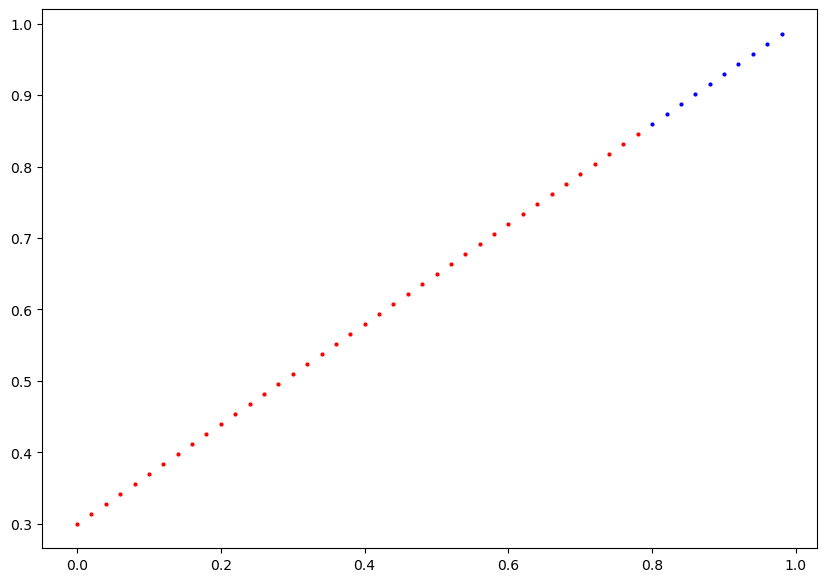

In [17]:
plot_predictions(X_train, y_train, X_test, y_test)

In [18]:
# Writing a Regression model with subclass nn.Module
class LinearRegressionModelV3(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set manual seed
torch.manual_seed(42)
model_0 = LinearRegressionModelV3()
model_0, model_0.state_dict()

(LinearRegressionModelV3(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [20]:
loss_fn = nn.L1Loss()
loss_fn

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [21]:
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680197238922 | Test Loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517989337444305 | Test Loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653176181018353 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645028764382005 | Test Loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645028764382005 | Test Loss: 0.013801807537674

In [22]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)

In [23]:
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

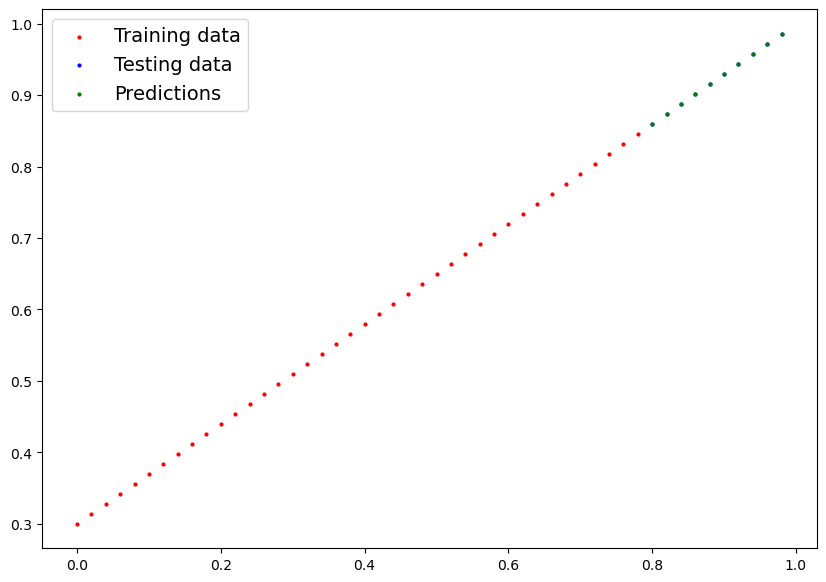

In [24]:
plot_predictions(predictions=y_preds)